# 読売３３３の評価

In [1]:
import sys
path_up = '..'
if not path_up in sys.path:
    sys.path.append(path_up)

In [2]:
import matplotlib.font_manager as fm
from matplotlib import dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
filename = 'report_yomiuri333.ods'
df = pd.read_excel(filename, index_col=0)
df.index = pd.to_datetime(df.index)
df

,日経225（終値）,TOPIX（終値）,読売333
Date,,,
2025-03-24,37608.49,2790.88,35507.74
2025-03-25,37780.54,2797.52,35649.12
2025-03-26,38027.29,2812.89,35757.01
2025-03-27,37799.97,2815.47,35836.16
2025-03-28,37120.33,2757.25,35178.04
...,...,...,...
2025-12-08,50581.94,3384.31,42995.24
2025-12-09,50655.10,3384.92,43019.23
2025-12-10,50602.80,3389.02,43198.15


In [4]:
dt = df.tail(1).index[0]
date_str = f"{dt.month:02d}{dt.day:02d}"
date_str

'1212'

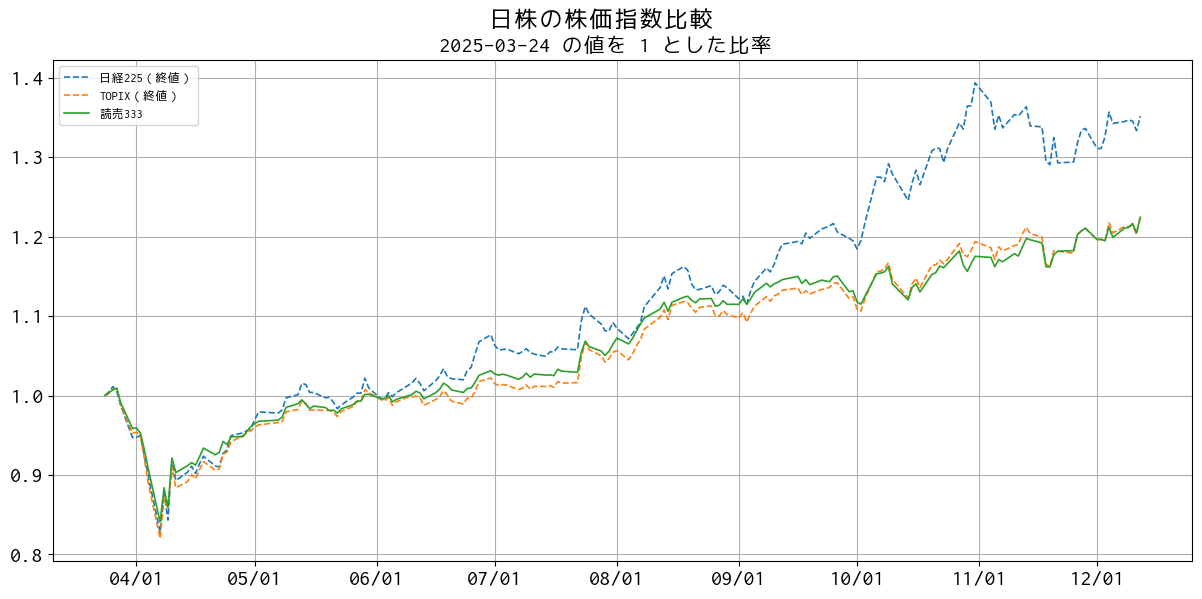

In [5]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 6))

for colname in df.columns:
    ser = df[colname] / df[colname].iloc[0]
    if colname == '読売333':
        lw = 1.2
        ls = "solid"
    else:
        lw = 1.2
        ls = "dashed"
    ax.plot(ser, label=colname, linewidth=lw, linestyle=ls)

ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))

fig.suptitle('日株の株価指数比較', fontsize=18)
ax.set_title("2025-03-24 の値を 1 とした比率   ", fontsize=16)
ax.grid()
ax.legend(loc='best', fontsize=9)

plt.tight_layout(pad=0.4, rect=[0, 0, 1.0, 1.0])
plt.savefig(f"{date_str}_report_yomiuri333.png" )
plt.show()